### Library Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt

---

In [7]:
TUID = [9, 1, 5, 1, 8, 7, 2, 8, 9]
LETTER_MAP = ['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']
total_sum = 0

for i in range(len(TUID)):
    total_sum += TUID[i]

average = total_sum / len(TUID)

print(f'my TUID average: {average}')

# Create a dictionary to map letters to integers
letter_to_int_map = {letter: integer for letter, integer in zip(LETTER_MAP, TUID)}

# Now, calculate the average of the letters of interest
alpha_letters = ["A", "B", "C"]
beta_letters = ["D", "E", "F"]
gamma_letters = ["G", "H", "I"]

alpha = np.average([letter_to_int_map[letter] for letter in alpha_letters]) / 10
print(alpha)

beta = np.average([letter_to_int_map[letter] for letter in beta_letters]) / 10
print(beta)

gamma = np.average([letter_to_int_map[letter] for letter in gamma_letters]) / 10
print(gamma)


my TUID average: 5.555555555555555
0.6333333333333333
0.5333333333333333
0.5


In [8]:
def runge_kutta_4th_order(h, T, u0, alpha, beta):
    # The system of ODEs
    def f(t, u):
        y, y_prime, y_double_prime = u
        f1 = y_prime
        f2 = y_double_prime
        f3 = np.cos(3*t) - alpha*y_double_prime - beta*y*y_double_prime
        return [f1, f2, f3]

    t_values = np.arange(0, T+h, h)
    u_values = [u0]

    for t in t_values[:-1]:
        u = u_values[-1]
        
        k1 = h * np.array(f(t, u))
        k2 = h * np.array(f(t + 0.5*h, u + 0.5*k1))
        k3 = h * np.array(f(t + 0.5*h, u + 0.5*k2))
        k4 = h * np.array(f(t + h, u + k3))
        
        new_u = u + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        u_values.append(new_u)

    return t_values, np.array(u_values)

# Parameters
T = 5
h = 0.01

# From TUID letter mapping
A = 9
B = 8
C = 2

u0 = [A, B, C]

alpha = np.average([letter_to_int_map[letter] for letter in alpha_letters]) / 10
beta = np.average([letter_to_int_map[letter] for letter in beta_letters]) / 10

t_values, u_values = runge_kutta_4th_order(h, T, u0, alpha, beta)


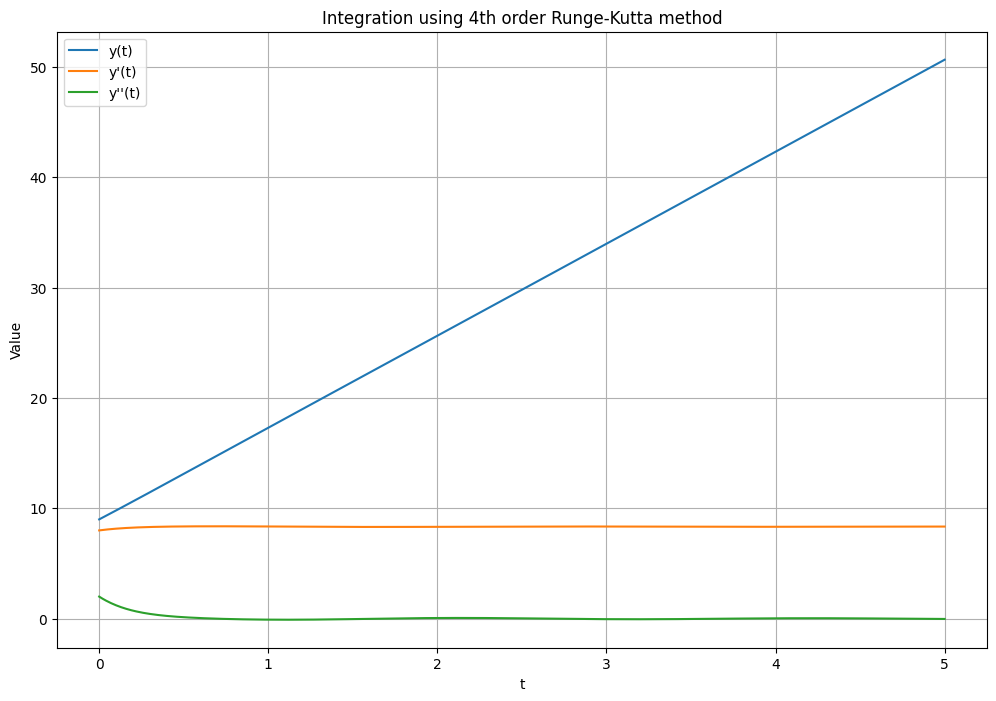

In [9]:
plt.figure(figsize=(12,8))
plt.plot(t_values, u_values[:, 0], label="y(t)")
plt.plot(t_values, u_values[:, 1], label="y'(t)")
plt.plot(t_values, u_values[:, 2], label="y''(t)")
plt.legend()
plt.xlabel('t')
plt.ylabel('Value')
plt.title('Integration using 4th order Runge-Kutta method')
plt.grid(True)
plt.show()

In [10]:
# Finding the index where y(t) is maximized
max_y_index = np.argmax(u_values[:, 0])
# Retrieving the corresponding time value
t_at_max_y = t_values[max_y_index]
# Finding the maximum value of y(t)
max_y_value = u_values[max_y_index, 0]

print(f"y(t) is maximized at t = {t_at_max_y} with a value of y(t) = {max_y_value}")

y(t) is maximized at t = 5.0 with a value of y(t) = 50.65956128756216
